In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

In [ ]:
!unzip '/content/drive/MyDrive/cotton-disease/cotton-disease.zip' -d '/content/drive/MyDrive/cotton-disease'

Archive:  /content/drive/MyDrive/cotton-disease/cotton-disease.zip
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: /content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.

In [ ]:
import os

dataset = '/content/drive/MyDrive/cotton-disease/Cotton Disease'

print(os.listdir(dataset))

['test', 'train', 'val']


In [ ]:
tr = '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/'


In [93]:
import glob

tr_folder = glob.glob('/content/drive/MyDrive/cotton-disease/Cotton Disease/train/**')
tr_folder

['/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton plant',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/fresh cotton leaf',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/fresh cotton plant']

In [96]:
valid = glob.glob('/content/drive/MyDrive/cotton-disease/Cotton Disease/val/**')
valid

['/content/drive/MyDrive/cotton-disease/Cotton Disease/val/diseased cotton leaf',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/val/diseased cotton plant',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/val/fresh cotton leaf',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/val/fresh cotton plant']

In [97]:
test = glob.glob('/content/drive/MyDrive/cotton-disease/Cotton Disease/test/**')
test

['/content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton leaf',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/test/diseased cotton plant',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/test/fresh cotton leaf',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/test/fresh cotton plant']

In [99]:
disease1 = glob.glob('/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/**')
disease1

['/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (10)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (102)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (103)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (104)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (105)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (106)_iaip.jpg',
 '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/diseased cotton leaf/dis_leaf (107)_iaip.jpg',
 '/content/drive/MyDrive/cotton

In [100]:
len(disease1)

288

In [101]:
train_dir = '/content/drive/MyDrive/cotton-disease/Cotton Disease/train/'
valid_dir = '/content/drive/MyDrive/cotton-disease/Cotton Disease/val/'
test_dir = '/content/drive/MyDrive/cotton-disease/Cotton Disease/test/'

In [102]:
image_size = [224, 224]
batch_size = 16

## Now call a pre-trained model

In [124]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [104]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [105]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1951 images belonging to 4 classes.


In [106]:
valid_set = test_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 253 images belonging to 4 classes.


In [107]:
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 106 images belonging to 4 classes.


## Now fine-tuned the pre-trained model

In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size) + [3])

87924736/87910968 [==============================] - 1s 0us/step


## Now False the trainable parameters

In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten

x = Flatten()(inception.output)

l1 = tf.keras.layers.Dense(4, activation='softmax')(x)

model = Model(inputs= inception.input, outputs= l1)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [108]:
steps_per = 1951 // batch_size
valid_stp = 253 // batch_size
epochs = 15

In [ ]:
 model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['acc'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch = steps_per,
                    epochs= epochs,
                    validation_data = valid_set,
                    validation_steps = valid_stp,
                    verbose = 1)

Epoch 1/15
121/121 [==============================] - 83s 399ms/step - loss: 3.0927 - acc: 0.7059 - val_loss: 0.5727 - val_acc: 0.8708
Epoch 2/15
121/121 [==============================] - 46s 378ms/step - loss: 1.9876 - acc: 0.8171 - val_loss: 0.7496 - val_acc: 0.8875
Epoch 3/15
121/121 [==============================] - 46s 383ms/step - loss: 1.9336 - acc: 0.8331 - val_loss: 0.8557 - val_acc: 0.8750
Epoch 4/15
121/121 [==============================] - 46s 378ms/step - loss: 2.2616 - acc: 0.8460 - val_loss: 3.7868 - val_acc: 0.7583
Epoch 5/15
121/121 [==============================] - 46s 380ms/step - loss: 2.4683 - acc: 0.8326 - val_loss: 1.2245 - val_acc: 0.8708
Epoch 6/15
121/121 [==============================] - 46s 381ms/step - loss: 1.8150 - acc: 0.8729 - val_loss: 1.3278 - val_acc: 0.9042
Epoch 7/15
121/121 [==============================] - 46s 377ms/step - loss: 1.6586 - acc: 0.8863 - val_loss: 1.8738 - val_acc: 0.8667
Epoch 8/15
121/121 [==============================] - 4

In [ ]:
model.save('/content/drive/MyDrive/cotton-disease/cotton_disease.h5')

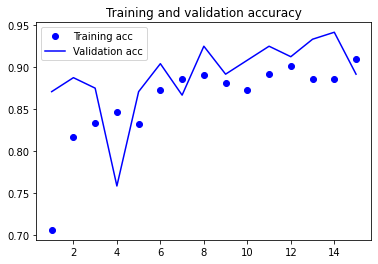

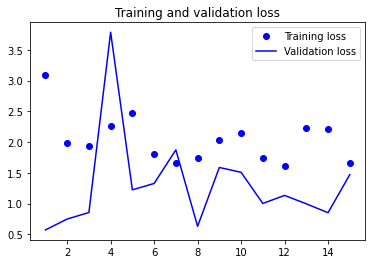

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

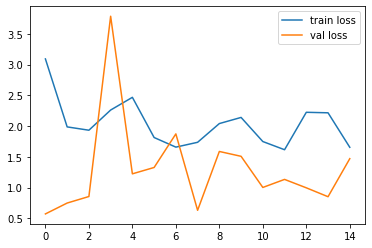

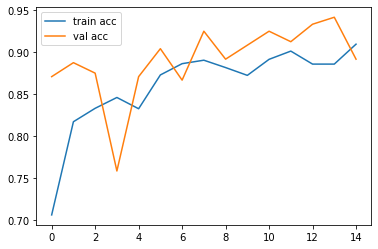

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [109]:
from keras import models, layers
# from keras import BatchNormalization

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(layers.MaxPooling2D(2, 2))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.BatchNormalization())

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.BatchNormalization())

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2, 2))

model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.BatchNormalization())

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(500, activation='relu'))
model2.add(layers.Dense(4, activation='softmax'))

In [110]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_103 (Bat (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 26, 26, 128)      

### Now train the model on simple convolutional neural network

In [111]:
steps_per, valid_stp

(121, 15)

In [112]:
model2.compile(optimizer= 'adam',
               loss= 'categorical_crossentropy',
               metrics = ['acc'])

In [113]:
hist = model2.fit(train_set,
                  steps_per_epoch = steps_per,
                  epochs= 15,
                  validation_data = valid_set,
                  validation_steps = valid_stp,
                  verbose = 1)


Epoch 1/15
121/121 [==============================] - 48s 372ms/step - loss: 2.4938 - acc: 0.5969 - val_loss: 11.2238 - val_acc: 0.2667
Epoch 2/15
121/121 [==============================] - 46s 377ms/step - loss: 1.2163 - acc: 0.6832 - val_loss: 9.6118 - val_acc: 0.2583
Epoch 3/15
121/121 [==============================] - 46s 378ms/step - loss: 0.7923 - acc: 0.7266 - val_loss: 3.3897 - val_acc: 0.4375
Epoch 4/15
121/121 [==============================] - 46s 376ms/step - loss: 0.6091 - acc: 0.7649 - val_loss: 0.9392 - val_acc: 0.7333
Epoch 5/15
121/121 [==============================] - 45s 370ms/step - loss: 0.5556 - acc: 0.7850 - val_loss: 1.7059 - val_acc: 0.6292
Epoch 6/15
121/121 [==============================] - 43s 358ms/step - loss: 0.5008 - acc: 0.8026 - val_loss: 0.8607 - val_acc: 0.7000
Epoch 7/15
121/121 [==============================] - 44s 360ms/step - loss: 0.4380 - acc: 0.8227 - val_loss: 0.4992 - val_acc: 0.8167
Epoch 8/15
121/121 [==============================] - 

In [114]:
model.save('/content/drive/MyDrive/cotton-disease/cotton_dis_plant.h5')

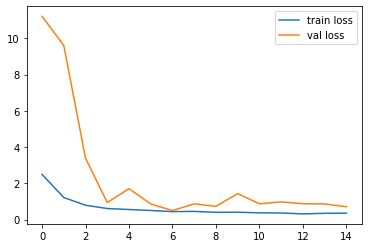

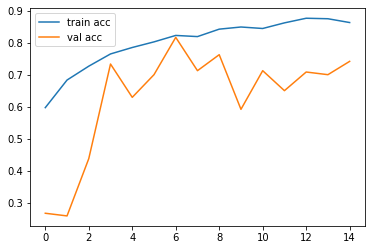

In [115]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
# x = range(120, 200)
# valid_nums = [num for num in x if num % 35 == 0]

In [ ]:
# valid_nums

[140, 175]

In [118]:
from keras.models import load_model
classifier = load_model('/content/drive/MyDrive/cotton-disease/cotton_disease.h5')

In [120]:
pred = classifier.predict(test_set)
pred

array([[9.99999881e-01, 0.00000000e+00, 1.17360266e-07, 2.21907459e-19],
       [0.00000000e+00, 2.05900192e-30, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.47483185e-33],
       [4.06699322e-31, 1.00000000e+00, 4.40013054e-26, 2.00725352e-12],
       [1.00000000e+00, 6.17232711e-30, 1.49051413e-21, 1.13583806e-34],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.02234976e-35, 1.29979006e-16, 1.21691640e-14],
       [3.67286827e-26, 2.10958004e-01, 1.84105873e-19, 7.89041936e-01],
       [0.00000000e+00, 4.15457282e-30, 4.00205207e-21, 1.00000000e+00],
       [2.55275772e-33, 2.41959922e-23, 0.00000000e+00, 1.00000000e+00],
       [1.45107523e-34, 6.23856067e-30, 1.00000000e+00, 5.67300384e-28],
       [0.00000000e+00, 1.69399550e-34, 0.00000000e+00, 1.00000000e+00],
       [6.04061857e-25, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.93996730e-06, 1.52865438e-29, 9.99975562e

In [121]:
y_arg_pred = np.argmax(pred, axis=1)
y_arg_pred

array([0, 3, 1, 1, 0, 3, 0, 3, 3, 3, 2, 3, 3, 2, 0, 2, 3, 2, 3, 2, 1, 1,
       1, 0, 3, 0, 0, 0, 3, 1, 3, 0, 2, 2, 2, 3, 0, 3, 0, 0, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 0, 0, 0, 1, 3, 2, 0, 0, 3, 2, 0, 2,
       0, 2, 2, 1, 0, 1, 2, 1, 1, 3, 0, 1, 3, 3, 0, 2, 3, 2, 0, 1, 1, 2,
       0, 1, 1, 3, 3, 0, 1, 2, 3, 1, 2, 2, 3, 3, 3, 3, 1, 3])

In [128]:
img = load_img('/content/12197.jpeg', target_size=(224, 224))

In [129]:
x1 = img_to_array(img)
x1

array([[[105., 131.,  68.],
        [106., 128.,  64.],
        [129., 148.,  82.],
        ...,
        [ 37.,  53.,  24.],
        [ 37.,  56.,  26.],
        [ 37.,  56.,  26.]],

       [[131., 159.,  85.],
        [144., 170.,  96.],
        [164., 188., 110.],
        ...,
        [ 46.,  56.,  22.],
        [ 49.,  63.,  28.],
        [ 43.,  58.,  25.]],

       [[164., 196., 113.],
        [180., 209., 127.],
        [186., 214., 130.],
        ...,
        [ 82.,  76.,  40.],
        [ 78.,  78.,  40.],
        [ 67.,  73.,  35.]],

       ...,

       [[178., 119., 103.],
        [162., 103.,  85.],
        [159., 102.,  83.],
        ...,
        [119., 149.,  85.],
        [121., 152.,  85.],
        [118., 147.,  81.]],

       [[170., 111.,  95.],
        [164., 107.,  90.],
        [165., 108.,  91.],
        ...,
        [120., 151.,  84.],
        [118., 147.,  81.],
        [125., 154.,  88.]],

       [[173., 112.,  94.],
        [168., 109.,  93.],
        [169., 1

In [130]:
x1 = x1/255

In [132]:
x1

array([[[0.4117647 , 0.5137255 , 0.26666668],
        [0.41568628, 0.5019608 , 0.2509804 ],
        [0.5058824 , 0.5803922 , 0.32156864],
        ...,
        [0.14509805, 0.20784314, 0.09411765],
        [0.14509805, 0.21960784, 0.10196079],
        [0.14509805, 0.21960784, 0.10196079]],

       [[0.5137255 , 0.62352943, 0.33333334],
        [0.5647059 , 0.6666667 , 0.3764706 ],
        [0.6431373 , 0.7372549 , 0.43137255],
        ...,
        [0.18039216, 0.21960784, 0.08627451],
        [0.19215687, 0.24705882, 0.10980392],
        [0.16862746, 0.22745098, 0.09803922]],

       [[0.6431373 , 0.76862746, 0.44313726],
        [0.7058824 , 0.81960785, 0.49803922],
        [0.7294118 , 0.8392157 , 0.50980395],
        ...,
        [0.32156864, 0.29803923, 0.15686275],
        [0.30588236, 0.30588236, 0.15686275],
        [0.2627451 , 0.28627452, 0.13725491]],

       ...,

       [[0.69803923, 0.46666667, 0.40392157],
        [0.63529414, 0.40392157, 0.33333334],
        [0.62352943, 0

In [131]:
x1.shape

(224, 224, 3)

In [143]:
from tensorflow.keras.models import load_model
from keras.applications.inception_v3 import preprocess_input
import numpy as np

x1 = np.expand_dims(x1, axis=0)
img_data1 = preprocess_input(x1)
img_data1

array([[[[[[[[[[-0.9967705 , -0.9959708 , -0.9979085 ],
               [-0.99673975, -0.99606305, -0.9980315 ],
               [-0.9960323 , -0.99544793, -0.9974779 ],
               ...,
               [-0.99886197, -0.9983699 , -0.9992618 ],
               [-0.99886197, -0.9982776 , -0.9992003 ],
               [-0.99886197, -0.9982776 , -0.9992003 ]],

              [[-0.9959708 , -0.99510956, -0.9973856 ],
               [-0.99557096, -0.99477124, -0.9970473 ],
               [-0.9949558 , -0.99421763, -0.99661666],
               ...,
               [-0.99858516, -0.9982776 , -0.9993233 ],
               [-0.9984929 , -0.9980623 , -0.9991388 ],
               [-0.99867743, -0.9982161 , -0.99923104]],

              [[-0.9949558 , -0.9939715 , -0.9965244 ],
               [-0.9944637 , -0.9935717 , -0.9960938 ],
               [-0.99427915, -0.9934179 , -0.99600154],
               ...,
               [-0.9974779 , -0.9976624 , -0.9987697 ],
               [-0.9976009 , -0.9976009 

In [144]:
img_data1.shape

(1, 1, 1, 1, 1, 1, 1, 224, 224, 3)

In [145]:
img_path = '/content/images.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [146]:
x.shape

(1, 224, 224, 3)

In [147]:
a1 = classifier.predict(x)
a1

array([[1.8724250e-32, 3.6256825e-14, 2.2078633e-10, 1.0000000e+00]],
      dtype=float32)

In [148]:
a = np.argmax(a1, axis=1)
a

array([3])

In [123]:
len(y_arg_pred)

106

In [ ]:
# pred_fl = pred.flatten()


In [149]:
# from sklearn.metrics import confusion_matrix, classification_report

# cm = confusion_matrix(test_set, y_arg_pred)
# cm

In [150]:
img_path = '/content/12197.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x2 = image.img_to_array(img)
x2 = np.expand_dims(x2, axis=0)
x2 = preprocess_input(x2)

In [151]:
x2 = classifier.predict(x2)
x2

array([[1.0000000e+00, 7.7610515e-23, 2.8419634e-14, 1.7327343e-17]],
      dtype=float32)

In [152]:
a2 = np.argmax(x2, axis=1)
a2

array([0])

In [153]:
img_path = '/content/cotton-plant-long-leaf-pink-flower-agriculture-business-spring-season-landscape-dark-fresh-field-green-charming-193343780.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x3 = image.img_to_array(img)
x3 = np.expand_dims(x3, axis=0)
x3 = preprocess_input(x3)

In [158]:
# pr = classifier.predict(x3)
# pr

In [155]:
a4 = np.argmax(x3, axis=1)
a4

array([3])